In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('eplusout.csv')
data_i = pd.DataFrame(data)
data_i.pop("Date/Time")
data_m = data_i.rename(columns = {'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)': 'Température extérieur',
                         'TZ1 WORK:Zone Total Internal Total Heating Energy [J](TimeStep)': 'Zone1:Energie chauffage',
                         'TZ2 MISC:Zone Total Internal Total Heating Energy [J](TimeStep)': 'Zone2:Energie chauffage',
                         'TZ2 MISC:Zone People Occupant Count [](TimeStep)': 'Zone2:Occupation',
                         'TZ1 WORK:Zone People Occupant Count [](TimeStep)': 'Zone1:Occupation',
                         'TZ1 WORK:Zone Air Temperature [C](TimeStep)': 'Zone1:Température intérieur',
                         'TZ1 WORK:Zone Air Relative Humidity [%](TimeStep)': 'Zone1:Humidité relative',
                         'TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)': 'Zone1:Thermostat',
                         'TZ2 MISC:Zone Air Temperature [C](TimeStep)': 'Zone2:Température intérieur',
                         'TZ2 MISC:Zone Air Relative Humidity [%](TimeStep)': 'Zone2:Humidité relative',
                         'TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)': 'Zone2:Thermostat',
                         'Electricity:Facility [J](TimeStep) ': 'Conso NRJ totale'})
data_f = data_m.reindex(columns=['Zone1:Occupation','Zone2:Occupation','Zone1:Humidité relative','Zone2:Humidité relative',
                        'Zone1:Thermostat','Zone2:Thermostat','Zone1:Température intérieur','Zone2:Température intérieur',
                        'Zone1:Energie chauffage','Zone2:Energie chauffage','Température extérieur','Conso NRJ totale'])
data_f.to_csv('C:/0n work/eplusout.csv')
data_f.head()

<AxesSubplot:>

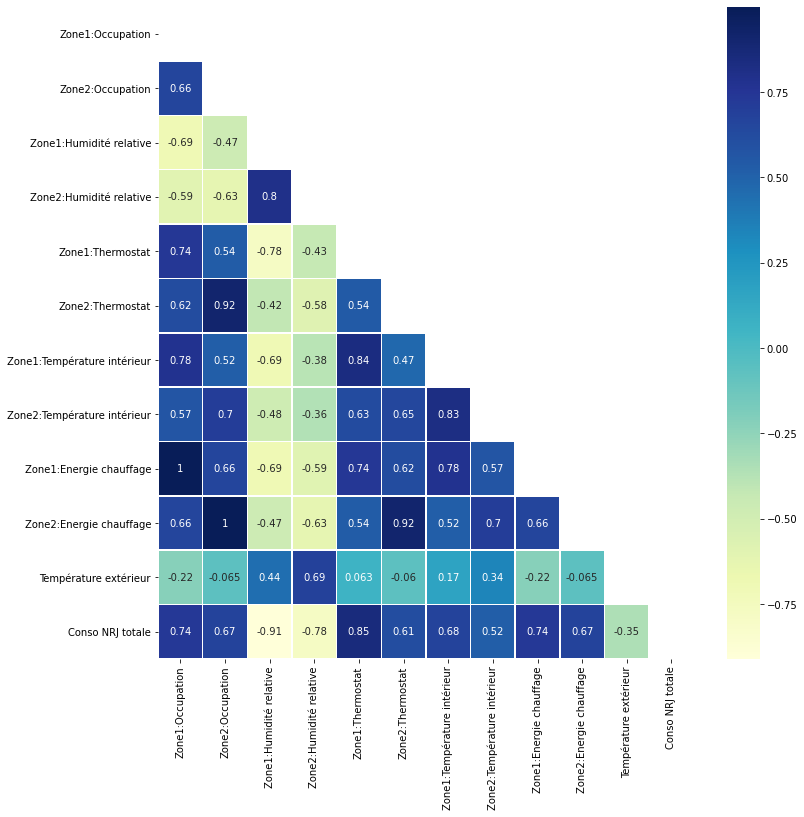

In [120]:
mask = np.zeros_like(data_f.corr(method = 'spearman'))
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (12,12))
sns.heatmap(data_f.corr(method = "spearman"), cmap = "YlGnBu", linewidths = 0.5, mask = mask, annot=True)